In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:

data = pd.read_csv('AAL.L.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1470,24/10/2019,1988.400024,2017.5,1980.199951,1983.599976,1983.599976,5787786
1471,25/10/2019,1987.599976,2019.5,1985.199951,2015.500000,2015.500000,3651461
1472,28/10/2019,2017.500000,2054.0,1991.400024,2042.500000,2042.500000,3221584
1473,29/10/2019,2052.000000,2059.0,2031.500000,2048.500000,2048.500000,2793653
1474,30/10/2019,2033.500000,2034.5,1981.199951,1998.000000,1998.000000,4021152


In [8]:
data_training = data[:1200]
data_test = data[1200:]

In [9]:

data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [10]:

scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.63948748, 0.63485166, 0.64025323, 0.62799424, 0.08328208],
       [0.62143273, 0.62409491, 0.63575265, 0.63092619, 0.04150181],
       [0.62230635, 0.62322274, 0.63365237, 0.61802562, 0.10413982],
       ...,
       [0.88549798, 0.88498987, 0.90506769, 0.88201831, 0.10786974],
       [0.86942344, 0.87673336, 0.89714661, 0.87838272, 0.10314092],
       [0.87315082, 0.87673336, 0.89150587, 0.88072828, 0.11337562]])

In [11]:
data_training[0:10]

array([[0.63948748, 0.63485166, 0.64025323, 0.62799424, 0.08328208],
       [0.62143273, 0.62409491, 0.63575265, 0.63092619, 0.04150181],
       [0.62230635, 0.62322274, 0.63365237, 0.61802562, 0.10413982],
       [0.61619103, 0.617699  , 0.62675148, 0.6189052 , 0.07036999],
       [0.60803727, 0.61205317, 0.62525128, 0.61069574, 0.06295159],
       [0.60483401, 0.60170922, 0.60334843, 0.58958571, 0.07064166],
       [0.58677927, 0.60403501, 0.60634882, 0.60307267, 0.08332105],
       [0.60250437, 0.61217525, 0.6207507 , 0.61685284, 0.05625171],
       [0.60454281, 0.60665151, 0.6207507 , 0.61069574, 0.0727995 ],
       [0.61560862, 0.64250934, 0.63545261, 0.65174303, 0.16734214]])

In [12]:

X_train = []
y_train = []

In [13]:
for i in range(30, data_training.shape[0]):
    X_train.append(data_training[i-30:i])
    y_train.append(data_training[i, 0])

In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:

X_train.shape

(1170, 30, 5)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [17]:

model = Sequential()
model.add(LSTM(units = 30, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(LSTM(30, activation='relu'))
model.add(Dense(1))


Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 30)            4320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 11,671
Trainable params: 11,671
Non-trainable params: 0
_________________________________________________________________


In [19]:

model.compile(optimizer='adam', loss = 'mean_squared_error')

Instructions for updating:
Use tf.cast instead.


In [20]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.1)

Train on 1053 samples, validate on 117 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1053/1053 [==============================] - 9s 8ms/sample - loss: 0.0874 - val_loss: 0.0088
Epoch 2/50
1053/1053 [==============================] - 6s 6ms/sample - loss: 0.0025 - val_loss: 0.0042
Epoch 3/50
1053/1053 [==============================] - 7s 6ms/sample - loss: 0.0013 - val_loss: 0.0032
Epoch 4/50
1053/1053 [==============================] - 6s 6ms/sample - loss: 0.0012 - val_loss: 0.0021
Epoch 5/50
1053/1053 [==============================] - 6s 6ms/sample - loss: 0.0012 - val_loss: 0.0018
Epoch 6/50
1053/1053 [==============================] - 6s 6ms/sample - loss: 0.0011 - val_loss: 0.0018
Epoch 7/50
1053/1053 [==============================] - 6s 6ms/sample - loss: 9.9477e-04 - val_loss: 0.0016
Epoch 8/50
1053/1053 [==============================] - 7s 6ms/sample - loss: 0.0010 - val_loss: 0.0018
Epoch 9/50
1053/1053 [==============================] - 6s 6ms/sample

In [21]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1200,01/10/2018,1722.800049,1734.599976,1702.599976,1715.599976,1634.089722,3572142
1201,02/10/2018,1705.400024,1742.800049,1692.199951,1741.199951,1658.473389,4972282
1202,03/10/2018,1740.400024,1772.599976,1731.199951,1755.400024,1671.998901,5042004
1203,04/10/2018,1752.800049,1767.199951,1728.400024,1743.199951,1660.378418,4713263
1204,05/10/2018,1726.199951,1726.199951,1667.400024,1669.199951,1589.894165,5974503


In [22]:
data_training


array([[0.63948748, 0.63485166, 0.64025323, 0.62799424, 0.08328208],
       [0.62143273, 0.62409491, 0.63575265, 0.63092619, 0.04150181],
       [0.62230635, 0.62322274, 0.63365237, 0.61802562, 0.10413982],
       ...,
       [0.88549798, 0.88498987, 0.90506769, 0.88201831, 0.10786974],
       [0.86942344, 0.87673336, 0.89714661, 0.87838272, 0.10314092],
       [0.87315082, 0.87673336, 0.89150587, 0.88072828, 0.11337562]])

In [23]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1200,01/10/2018,1722.800049,1734.599976,1702.599976,1715.599976,1634.089722,3572142
1201,02/10/2018,1705.400024,1742.800049,1692.199951,1741.199951,1658.473389,4972282
1202,03/10/2018,1740.400024,1772.599976,1731.199951,1755.400024,1671.998901,5042004
1203,04/10/2018,1752.800049,1767.199951,1728.400024,1743.199951,1660.378418,4713263
1204,05/10/2018,1726.199951,1726.199951,1667.400024,1669.199951,1589.894165,5974503


In [24]:



data_test.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
1445,19/09/2019,1898.599976,1917.199951,1883.400024,1883.400024,1883.400024,6664678
1446,20/09/2019,1888.199951,1896.400024,1860.199951,1896.400024,1896.400024,42663225
1447,23/09/2019,1888.000000,1891.199951,1832.000000,1870.800049,1870.800049,8204542
1448,24/09/2019,1881.800049,1881.800049,1823.599976,1832.199951,1832.199951,6160251
1449,25/09/2019,1820.000000,1848.400024,1803.760010,1841.599976,1841.599976,3997685
1450,26/09/2019,1834.400024,1873.400024,1833.199951,1840.599976,1840.599976,4754924
1451,27/09/2019,1850.000000,1899.400024,1850.000000,1886.400024,1886.400024,3494048
1452,30/09/2019,1893.199951,1900.800049,1867.400024,1871.199951,1871.199951,3904340
1453,01/10/2019,1880.199951,1888.599976,1857.000000,1863.800049,1863.800049,5153662
1454,02/10/2019,1861.000000,1862.400024,1788.800049,1799.000000,1799.000000,4518928


In [25]:
past_30_days = data_test.tail(30)

In [26]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
1200,01/10/2018,1722.800049,1734.599976,1702.599976,1715.599976,1634.089722,3572142
1201,02/10/2018,1705.400024,1742.800049,1692.199951,1741.199951,1658.473389,4972282
1202,03/10/2018,1740.400024,1772.599976,1731.199951,1755.400024,1671.998901,5042004
1203,04/10/2018,1752.800049,1767.199951,1728.400024,1743.199951,1660.378418,4713263
1204,05/10/2018,1726.199951,1726.199951,1667.400024,1669.199951,1589.894165,5974503
1205,08/10/2018,1669.000000,1673.400024,1644.400024,1646.800049,1568.558472,5089249
1206,09/10/2018,1663.000000,1697.400024,1653.000000,1692.400024,1611.991943,4925120
1207,10/10/2018,1693.800049,1693.800049,1634.400024,1634.599976,1556.938232,5663064
1208,11/10/2018,1600.000000,1648.599976,1585.000000,1620.000000,1543.031738,7575427
1209,12/10/2018,1656.400024,1712.199951,1642.199951,1684.000000,1603.991089,8497200


In [27]:
df = past_30_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1898.599976,1917.199951,1883.400024,1883.400024,6664678
1,1888.199951,1896.400024,1860.199951,1896.400024,42663225
2,1888.000000,1891.199951,1832.000000,1870.800049,8204542
3,1881.800049,1881.800049,1823.599976,1832.199951,6160251
4,1820.000000,1848.400024,1803.760010,1841.599976,3997685


In [28]:

inputs = scaler.transform(df)
inputs

array([[0.97647057, 0.98209142, 1.00084012, 0.97478524, 0.15409565],
       [0.97041348, 0.96999738, 0.98691827, 0.9824083 , 1.04412592],
       [0.97029703, 0.96697382, 0.9699961 , 0.96739674, 0.19216734],
       ...,
       [1.04571928, 1.06163332, 1.06564855, 1.06807985, 0.06896839],
       [1.06581246, 1.06454055, 1.08971166, 1.07159819, 0.05838819],
       [1.05503786, 1.05029511, 1.05952771, 1.0419855 , 0.08873695]])

In [29]:
X_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    X_test.append(inputs[i-30:i])
    y_test.append(inputs[i, 0])

In [30]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((275, 30, 5), (275,))

In [31]:
y_pred = model.predict(X_test)

In [32]:
scaler.scale_

array([5.82411182e-04, 5.81446395e-04, 6.00078011e-04, 5.86389883e-04,
       2.47240609e-08])

In [33]:
scale = 1/0.00058241
scale

1717.0034855170757

In [34]:
y_pred = y_pred*scale
y_test = y_test*scale

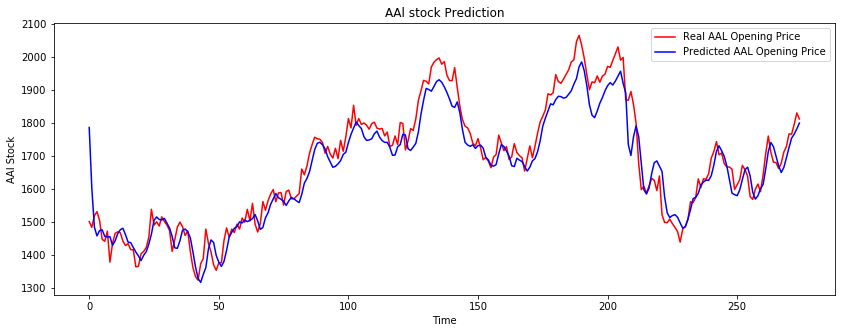

In [35]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real AAL Opening Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted AAL Opening Price')
plt.title('AAl stock Prediction')
plt.xlabel('Time')
plt.ylabel('AAl Stock')
plt.legend()
plt.show()

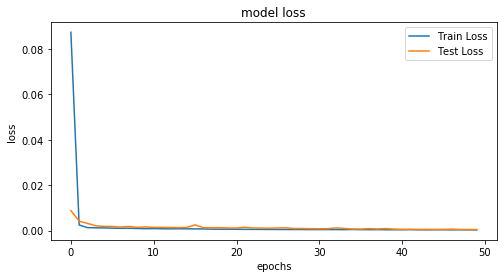

In [36]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [39]:
testScore = sqrt(mean_squared_error(y_pred,y_test))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 50.45 RMSE
